In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from keras.datasets import mnist

(train_images,train_labels),(test_images,test_labels)=mnist.load_data()

11490434/11490434 [==============================] - 14s 1us/step


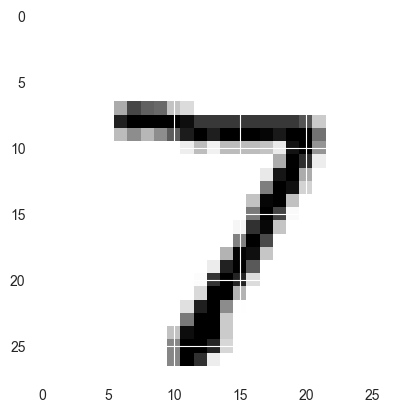

In [5]:
picture = test_images[0]
plt.imshow(picture,cmap='binary')
plt.show()

In [27]:
train_images

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [8]:
train_images = train_images/255
test_images = test_images/255

In [12]:
from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [13]:
test_labels[1]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [14]:
import keras
from keras import layers
from keras import Input

inputs=Input(shape=(28,28,1))
x = layers.Conv2D(filters=48,kernel_size=3,activation='relu')(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=100,kernel_size=3,activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=120,kernel_size=3,activation='relu')(x)
x = layers.Flatten()(x)
outputs=layers.Dense(10,activation='softmax')(x)
model = keras.Model(inputs=inputs,outputs=outputs)

In [15]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 48)        480       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 48)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 100)       43300     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 100)         0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 120)         108120

In [16]:
model.compile(optimizer='adam',loss='categorical_crossentropy',
                metrics='accuracy')

In [17]:
history = model.fit(train_images,train_labels,epochs=15,
                      batch_size=128,validation_split=0.2)

Epoch 1/15
375/375 [==============================] - 42s 106ms/step - loss: 0.2326 - accuracy: 0.9301 - val_loss: 0.0760 - val_accuracy: 0.9764
Epoch 2/15
375/375 [==============================] - 38s 100ms/step - loss: 0.0579 - accuracy: 0.9823 - val_loss: 0.0522 - val_accuracy: 0.9849
Epoch 3/15
375/375 [==============================] - 37s 98ms/step - loss: 0.0390 - accuracy: 0.9875 - val_loss: 0.0511 - val_accuracy: 0.9847
Epoch 4/15
375/375 [==============================] - 38s 101ms/step - loss: 0.0288 - accuracy: 0.9908 - val_loss: 0.0448 - val_accuracy: 0.9871
Epoch 5/15
375/375 [==============================] - 38s 101ms/step - loss: 0.0227 - accuracy: 0.9927 - val_loss: 0.0499 - val_accuracy: 0.9867
Epoch 6/15
375/375 [==============================] - 36s 97ms/step - loss: 0.0202 - accuracy: 0.9935 - val_loss: 0.0363 - val_accuracy: 0.9891
Epoch 7/15
375/375 [==============================] - 37s 100ms/step - loss: 0.0149 - accuracy: 0.9952 - val_loss: 0.0360 - val_accu

In [ ]:
#100 features:  loss: 0.0051 - accuracy: 0.9982 - val_loss: 0.0616 - val_accuracy: 0.9878
#100 features/ 120 features: loss: 0.0066 - accuracy: 0.9976 - val_loss: 0.0418 - val_accuracy: 0.9907

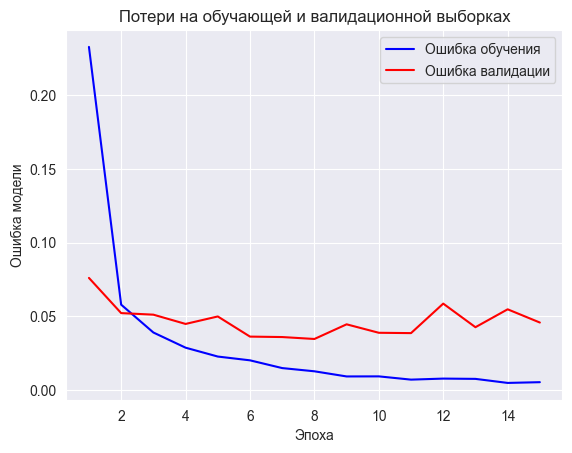

In [18]:
loss_function = history.history['loss']
val_loss_function = history.history['val_loss']
epochs = range(1,len(loss_function)+1)
plt.title('Потери на обучающей и валидационной выборках')
plt.plot(epochs,loss_function,color='blue',label='Ошибка обучения')
plt.plot(epochs,val_loss_function,color='red',label='Ошибка валидации')
plt.xlabel('Эпоха')
plt.ylabel('Ошибка модели')
plt.legend()
plt.show()

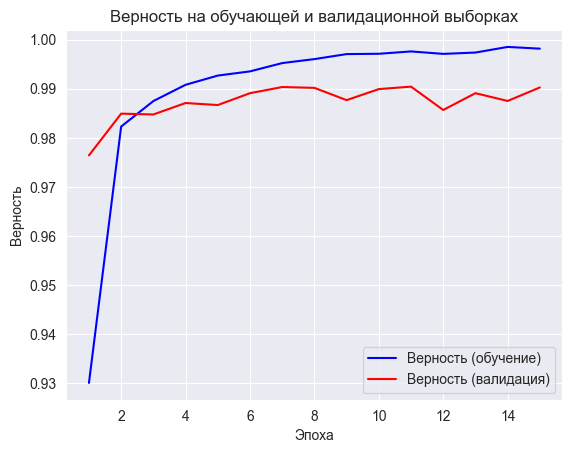

In [19]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
plt.title('Верность на обучающей и валидационной выборках')
plt.plot(epochs,accuracy,color='blue',label='Верность (обучение)')
plt.plot(epochs,val_accuracy,color='red',label='Верность (валидация)')
plt.xlabel('Эпоха')
plt.ylabel('Верность')
plt.legend()
plt.show()

In [20]:
model.evaluate(test_images,test_labels)

313/313 [==============================] - 3s 10ms/step - loss: 0.0320 - accuracy: 0.9910


[0.031976018100976944, 0.9909999966621399]

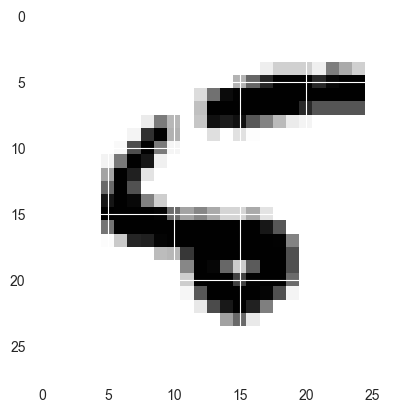

In [21]:
index=8
picture = test_images[index]
plt.imshow(picture,cmap='binary')
plt.show()

In [ ]:
test_image = np.expand_dims(test_images[index],axis=0)
output = model.predict(test_image)
print(output)
print(test_labels[index])

1/1 [==============================] - 0s 210ms/step
[[1.8863671e-09 6.5086421e-12 4.3107676e-10 9.0136974e-13 3.3969386e-14
  9.9991274e-01 7.1480303e-05 4.9867499e-13 1.5740685e-05 1.1901754e-09]]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
